Data Reading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('oil-spill.csv')

# Basic exploration
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()
print("\nData Info:")
df.info()
print("\nSummary Statistics:")
df.describe()


Dataset Shape: (53, 5)

First 5 rows:

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Entity                            53 non-null     object
 1   Code                              53 non-null     object
 2   Year                              53 non-null     int64 
 3   Large oil spills (>700 tonnes)    53 non-null     int64 
 4   Medium oil spills (7-700 tonnes)  53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB

Summary Statistics:


,Year,Large oil spills (>700 tonnes),Medium oil spills (7-700 tonnes)
count,53.000000,53.000000,53.000000
mean,1996.000000,8.867925,26.245283
std,15.443445,8.801306,22.764603
min,1970.000000,0.000000,2.000000
25%,1983.000000,3.000000,7.000000
50%,1996.000000,5.000000,20.000000
75%,2009.000000,13.000000,32.000000
max,2022.000000,32.000000,96.000000


Data Visualization for Trend Analysis

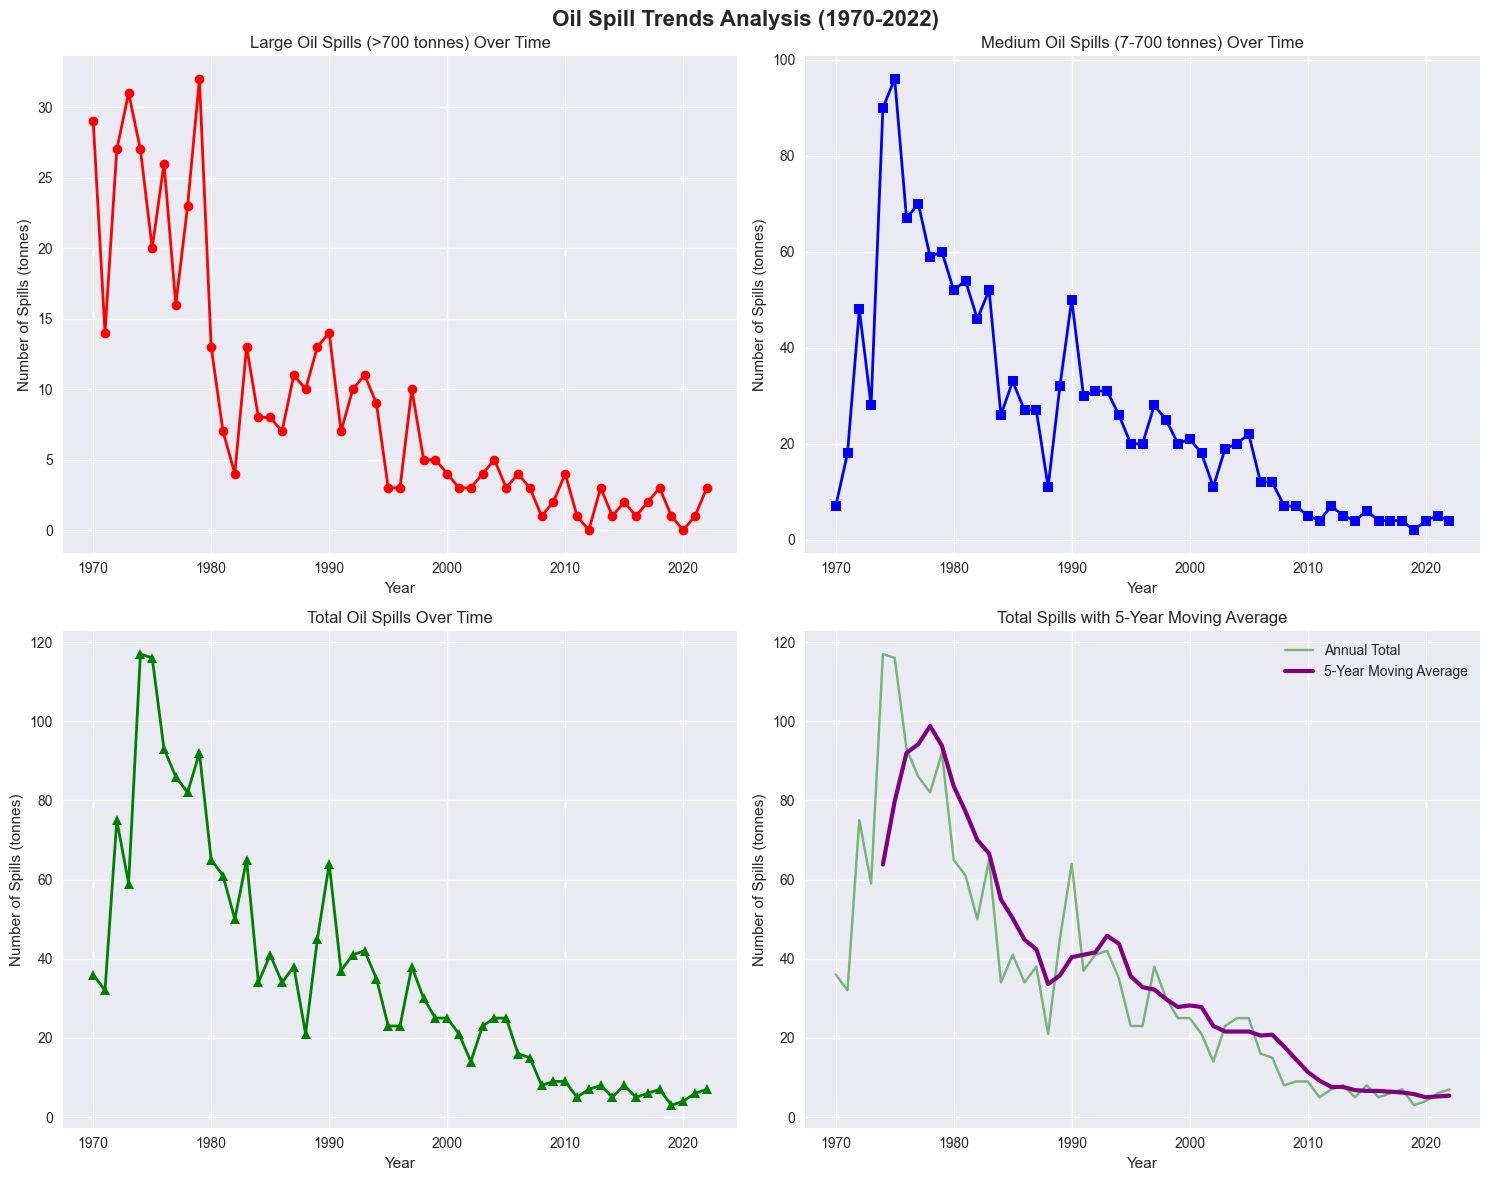

In [2]:

# Set up the visualization style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Oil Spill Trends Analysis (1970-2022)', fontsize=16, fontweight='bold')

# Large oil spills trend
axes[0, 0].plot(df['Year'], df['Large oil spills (>700 tonnes)'], 
                color='red', marker='o', linewidth=2)
axes[0, 0].set_title('Large Oil Spills (>700 tonnes) Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Spills (tonnes)')
axes[0, 0].grid(True)

# Medium oil spills trend
axes[0, 1].plot(df['Year'], df['Medium oil spills (7-700 tonnes)'], 
                color='blue', marker='s', linewidth=2)
axes[0, 1].set_title('Medium Oil Spills (7-700 tonnes) Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Spills (tonnes)')
axes[0, 1].grid(True)

# Total spills (large + medium)
df['Total Spills'] = df['Large oil spills (>700 tonnes)'] + df['Medium oil spills (7-700 tonnes)']
axes[1, 0].plot(df['Year'], df['Total Spills'], 
                color='green', marker='^', linewidth=2)
axes[1, 0].set_title('Total Oil Spills Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Spills (tonnes)')
axes[1, 0].grid(True)

# 5-year moving average for total spills
df['5yr_MA'] = df['Total Spills'].rolling(window=5).mean()
axes[1, 1].plot(df['Year'], df['Total Spills'], 
                color='green', alpha=0.5, label='Annual Total')
axes[1, 1].plot(df['Year'], df['5yr_MA'], 
                color='purple', linewidth=3, label='5-Year Moving Average')
axes[1, 1].set_title('Total Spills with 5-Year Moving Average')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Spills (tonnes)')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Decadal Analysis

Decadal Analysis:
        Large oil spills (>700 tonnes)  Medium oil spills (7-700 tonnes)  \
Decade                                                                     
1970                               245                               543   
1980                                94                               360   
1990                                77                               281   
2000                                32                               149   
2010                                18                                45   
2020                                 4                                13   

        Total Spills  Years  Avg_Annual_Large  Avg_Annual_Medium  \
Decade                                                             
1970             788     10         24.500000          54.300000   
1980             454     10          9.400000          36.000000   
1990             358     10          7.700000          28.100000   
2000             181     10      

<Figure size 1200x600 with 0 Axes>

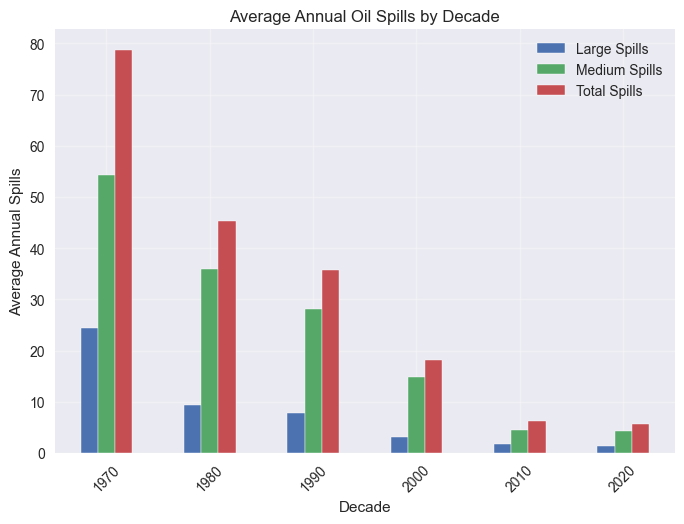

In [3]:
# Create decade column
df['Decade'] = (df['Year'] // 10) * 10

# Group by decade
decade_stats = df.groupby('Decade').agg({
    'Large oil spills (>700 tonnes)': 'sum',
    'Medium oil spills (7-700 tonnes)': 'sum',
    'Total Spills': 'sum',
    'Year': 'count'  # Count number of years in each decade
}).rename(columns={'Year': 'Years'})

decade_stats['Avg_Annual_Large'] = decade_stats['Large oil spills (>700 tonnes)'] / decade_stats['Years']
decade_stats['Avg_Annual_Medium'] = decade_stats['Medium oil spills (7-700 tonnes)'] / decade_stats['Years']
decade_stats['Avg_Annual_Total'] = decade_stats['Total Spills'] / decade_stats['Years']

print("Decadal Analysis:")
print(decade_stats)

# Plot decadal trends
plt.figure(figsize=(12, 6))
decade_stats[['Avg_Annual_Large', 'Avg_Annual_Medium', 'Avg_Annual_Total']].plot(kind='bar')
plt.title('Average Annual Oil Spills by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Annual Spills')
plt.xticks(rotation=45)
plt.legend(['Large Spills', 'Medium Spills', 'Total Spills'])
plt.grid(True, alpha=0.3)
plt.show()

Key Metrics and Insights

In [4]:
# Calculate key metrics
total_large = df['Large oil spills (>700 tonnes)'].sum()
total_medium = df['Medium oil spills (7-700 tonnes)'].sum()
total_all = total_large + total_medium

# Worst years
worst_year_total = df.loc[df['Total Spills'].idxmax()]
worst_year_large = df.loc[df['Large oil spills (>700 tonnes)'].idxmax()]

# Recent trends (last 10 years vs first 10 years)
first_decade = df[df['Year'] <= 1979]
last_decade = df[df['Year'] >= 2013]

first_avg = first_decade['Total Spills'].mean()
last_avg = last_decade['Total Spills'].mean()
reduction_pct = ((first_avg - last_avg) / first_avg) * 100

# Print key insights
print("="*60)
print("OIL SPILL ANALYSIS REPORT FOR PETROLEUM MANAGEMENT")
print("="*60)
print(f"Total large spills (>700 tonnes) since 1970: {total_large}")
print(f"Total medium spills (7-700 tonnes) since 1970: {total_medium}")
print(f"Combined total spills since 1970: {total_all}")
print(f"\nWorst year for total spills: {worst_year_total['Year']} "
      f"({worst_year_total['Total Spills']} spills)")
print(f"Worst year for large spills: {worst_year_large['Year']} "
      f"({worst_year_large['Large oil spills (>700 tonnes)']} large spills)")
print(f"\nAverage annual spills in first decade (1970-1979): {first_avg:.1f}")
print(f"Average annual spills in last decade (2013-2022): {last_avg:.1f}")
print(f"Percentage reduction: {reduction_pct:.1f}%")
print("\nYears with no large spills:")
no_large_spills = df[df['Large oil spills (>700 tonnes)'] == 0]['Year'].tolist()
print(no_large_spills)

OIL SPILL ANALYSIS REPORT FOR PETROLEUM MANAGEMENT
Total large spills (>700 tonnes) since 1970: 470
Total medium spills (7-700 tonnes) since 1970: 1391
Combined total spills since 1970: 1861

Worst year for total spills: 1974 (117 spills)
Worst year for large spills: 1979 (32 large spills)

Average annual spills in first decade (1970-1979): 78.8
Average annual spills in last decade (2013-2022): 5.9
Percentage reduction: 92.5%

Years with no large spills:
[2012, 2020]


Risk Assessment and Recommendations

In [5]:
# Calculate # Calculate spill probability and trends
annual_avg = df['Total Spills'].mean()
std_dev = df['Total Spills'].std()

print("\n" + "="*60)
print("RISK ASSESSMENT AND RECOMMENDATIONS")
print("="*60)
print(f"Average annual spills: {annual_avg:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Most years (68%) fall between {annual_avg-std_dev:.1f} and {annual_avg+std_dev:.1f} spills")

# Recent improvement analysis
recent_trend = df[df['Year'] >= 2000]
slope = np.polyfit(recent_trend['Year'], recent_trend['Total Spills'], 1)[0]
print(f"\nTrend since 2000: {slope:.2f} spills per year "
      f"({'decrease' if slope < 0 else 'increase'})")

# Recommendations
print("\nRECOMMENDATIONS:")
print("1. The significant reduction in spills over time suggests industry safety "
      "measures are effective and should be maintained.")
print("2. Despite improvements, vigilance is still needed as spills still occur.")
print("3. Focus on preventing large spills (>700 tonnes) as they have the most "
      "significant environmental impact.")
print("4. Continue investing in spill prevention technology and training, "
      "especially considering the " + 
      ("downward" if slope < 0 else "upward") + " trend in recent years.")
annual_avg = df['Total Spills'].mean()
std_dev = df['Total Spills'].std()

print("\n" + "="*60)
print("RISK ASSESSMENT AND RECOMMENDATIONS")
print("="*60)
print(f"Average annual spills: {annual_avg:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Most years (68%) fall between {annual_avg-std_dev:.1f} and {annual_avg+std_dev:.1f} spills")

# Recent improvement analysis
recent_trend = df[df['Year'] >= 2000]
slope = np.polyfit(recent_trend['Year'], recent_trend['Total Spills'], 1)[0]
print(f"\nTrend since 2000: {slope:.2f} spills per year "
      f"({'decrease' if slope < 0 else 'increase'})")

# Recommendations
print("\nRECOMMENDATIONS:")
print("1. The significant reduction in spills over time suggests industry safety "
      "measures are effective and should be maintained.")
print("2. Despite improvements, vigilance is still needed as spills still occur.")
print("3. Focus on preventing large spills (>700 tonnes) as they have the most "
      "significant environmental impact.")
print("4. Continue investing in spill prevention technology and training, "
      "especially considering the " + 
      ("downward" if slope < 0 else "upward") + " trend in recent years.")
print("5. Develop contingency plans for years with above-average spill counts "
      f"(>{annual_avg+std_dev:.1f} spills).")


RISK ASSESSMENT AND RECOMMENDATIONS
Average annual spills: 35.11
Standard deviation: 29.54
Most years (68%) fall between 5.6 and 64.7 spills

Trend since 2000: -0.92 spills per year (decrease)

RECOMMENDATIONS:
1. The significant reduction in spills over time suggests industry safety measures are effective and should be maintained.
2. Despite improvements, vigilance is still needed as spills still occur.
3. Focus on preventing large spills (>700 tonnes) as they have the most significant environmental impact.
4. Continue investing in spill prevention technology and training, especially considering the downward trend in recent years.

RISK ASSESSMENT AND RECOMMENDATIONS
Average annual spills: 35.11
Standard deviation: 29.54
Most years (68%) fall between 5.6 and 64.7 spills

Trend since 2000: -0.92 spills per year (decrease)

RECOMMENDATIONS:
1. The significant reduction in spills over time suggests industry safety measures are effective and should be maintained.
2. Despite improvements,

Export Key Findings

In [6]:
# Create a summary DataFrame for export
summary_data = {
    'Metric': [
        'Total Large Spills (1970-2022)',
        'Total Medium Spills (1970-2022)',
        'Combined Total Spills',
        'Worst Year (Total Spills)',
        'Worst Year (Large Spills)',
        'Average Annual Spills (1970-1979)',
        'Average Annual Spills (2013-2022)',
        'Percentage Reduction',
        'Recent Trend (since 2000)'
    ],
    'Value': [
        total_large,
        total_medium,
        total_all,
        f"{worst_year_total['Year']} ({worst_year_total['Total Spills']} spills)",
        f"{worst_year_large['Year']} ({worst_year_large['Large oil spills (>700 tonnes)']} large spills)",
        f"{first_avg:.1f}",
        f"{last_avg:.1f}",
        f"{reduction_pct:.1f}%",
        f"{slope:.2f} spills/year ({'decrease' if slope < 0 else 'increase'})"
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('oil_spill_summary_report.csv', index=False)
print("\nSummary report exported to 'oil_spill_summary_report.csv'")



Summary report exported to 'oil_spill_summary_report.csv'
